In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:

df=pd.read_csv('sc.csv', encoding='utf-8')

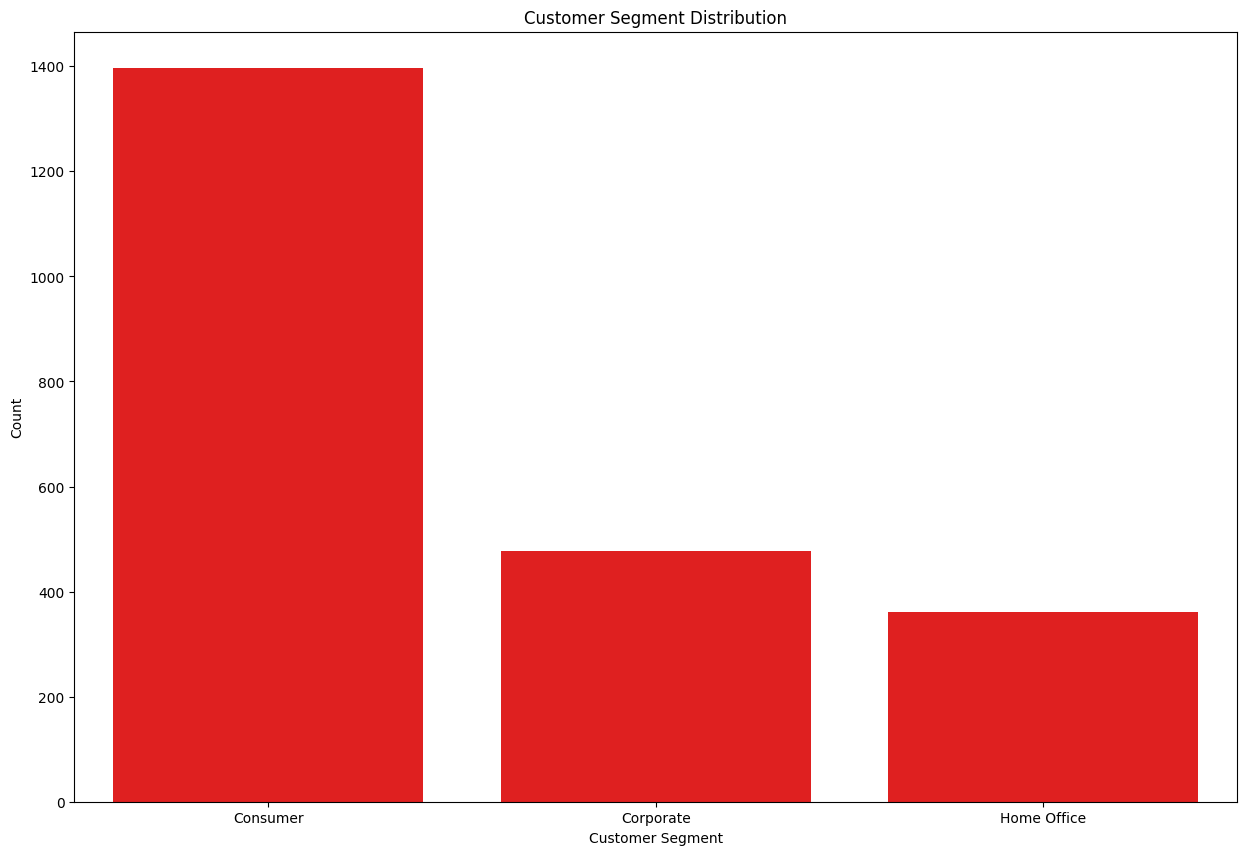

In [20]:
customer_segment_counts = df['Customer Segment'].value_counts()
market_counts = df['Market'].value_counts()
plt.figure(figsize=(15, 10))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values, color='red')
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.show()


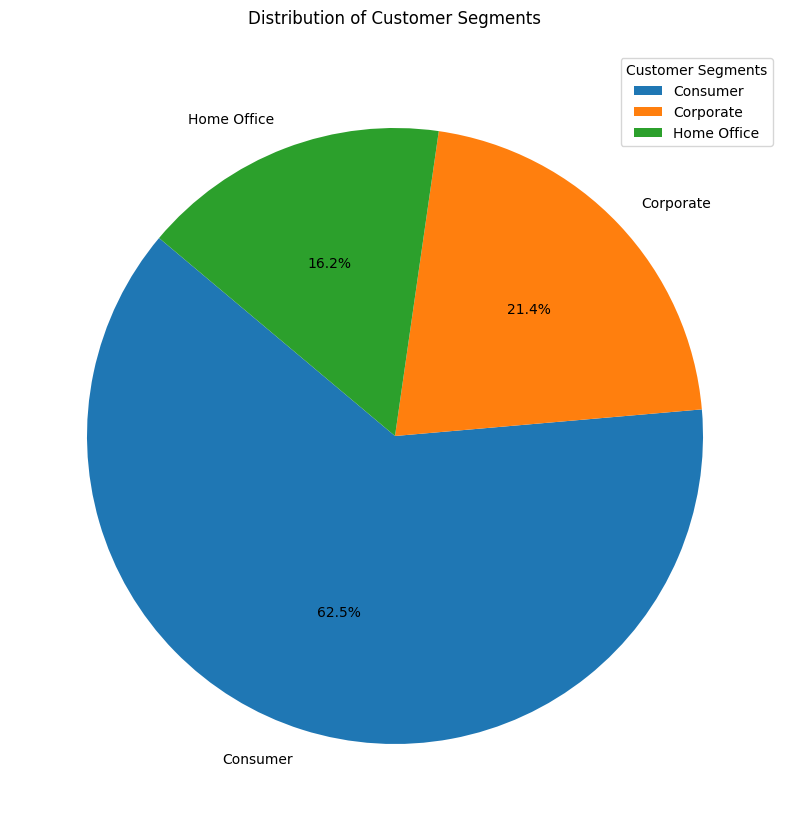

In [21]:
plt.figure(figsize=(15, 10))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments',loc='center', pad=20)
plt.legend(customer_segment_counts.index, title='Customer Segments', loc='best')
plt.show()

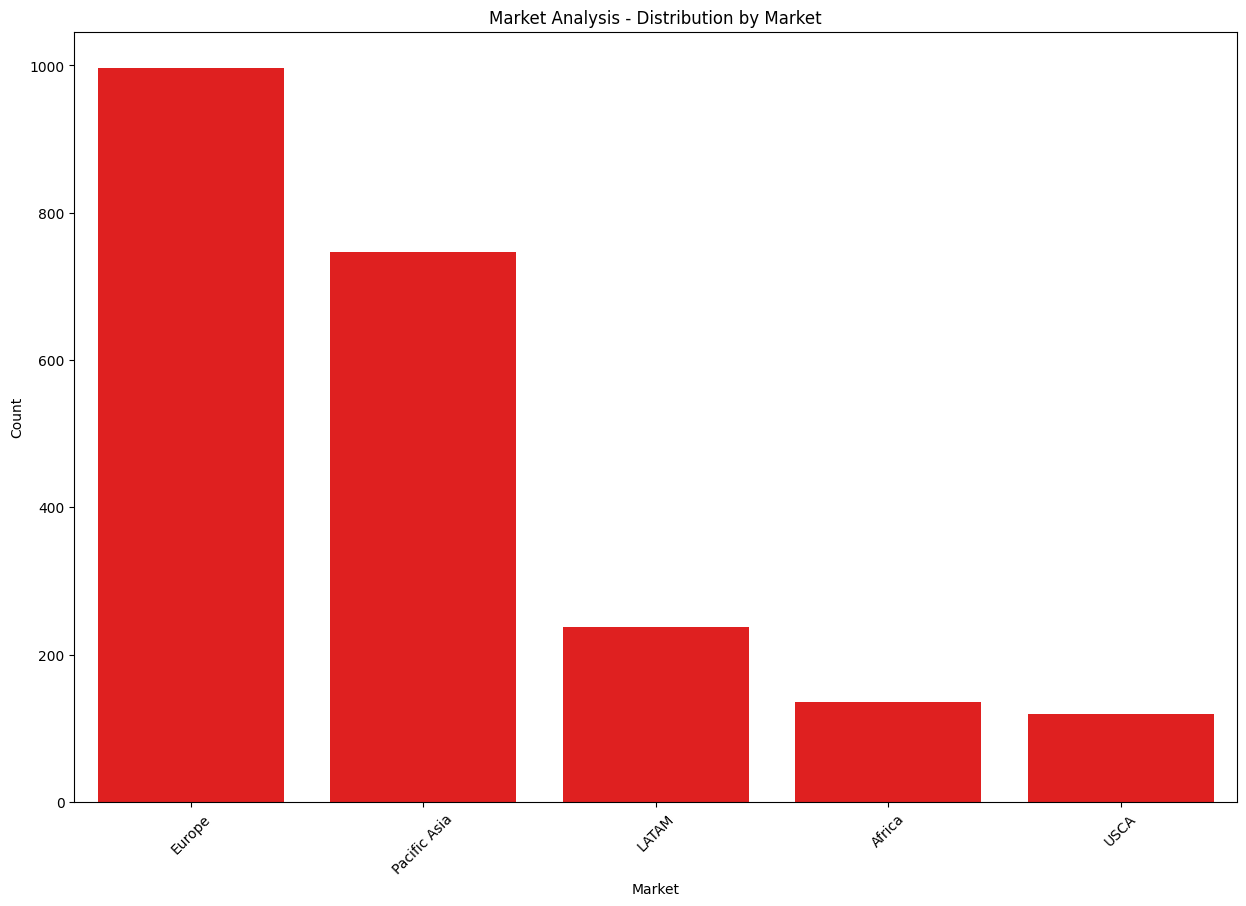

In [22]:
plt.figure(figsize=(15, 10))
sns.barplot(x=market_counts.index, y=market_counts.values, color='red')
plt.title('Market Analysis - Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

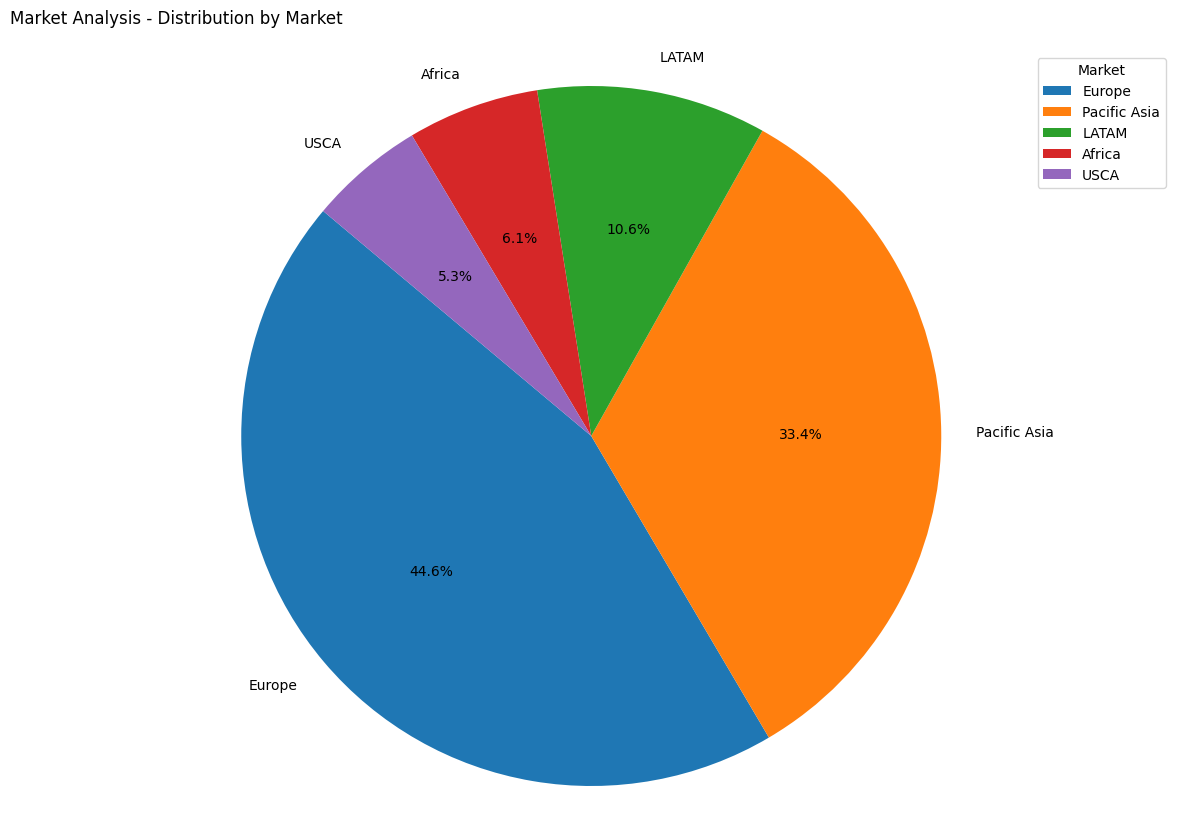

In [23]:
plt.figure(figsize=(15, 10))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Market', loc='left', pad=20)
plt.axis('equal')
plt.legend(market_counts.index, title='Market', loc='best')
plt.show()

<ipython-input-24-e7e64a098fe1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Delivery Status', order=delivery_counts.index, palette='Set3')


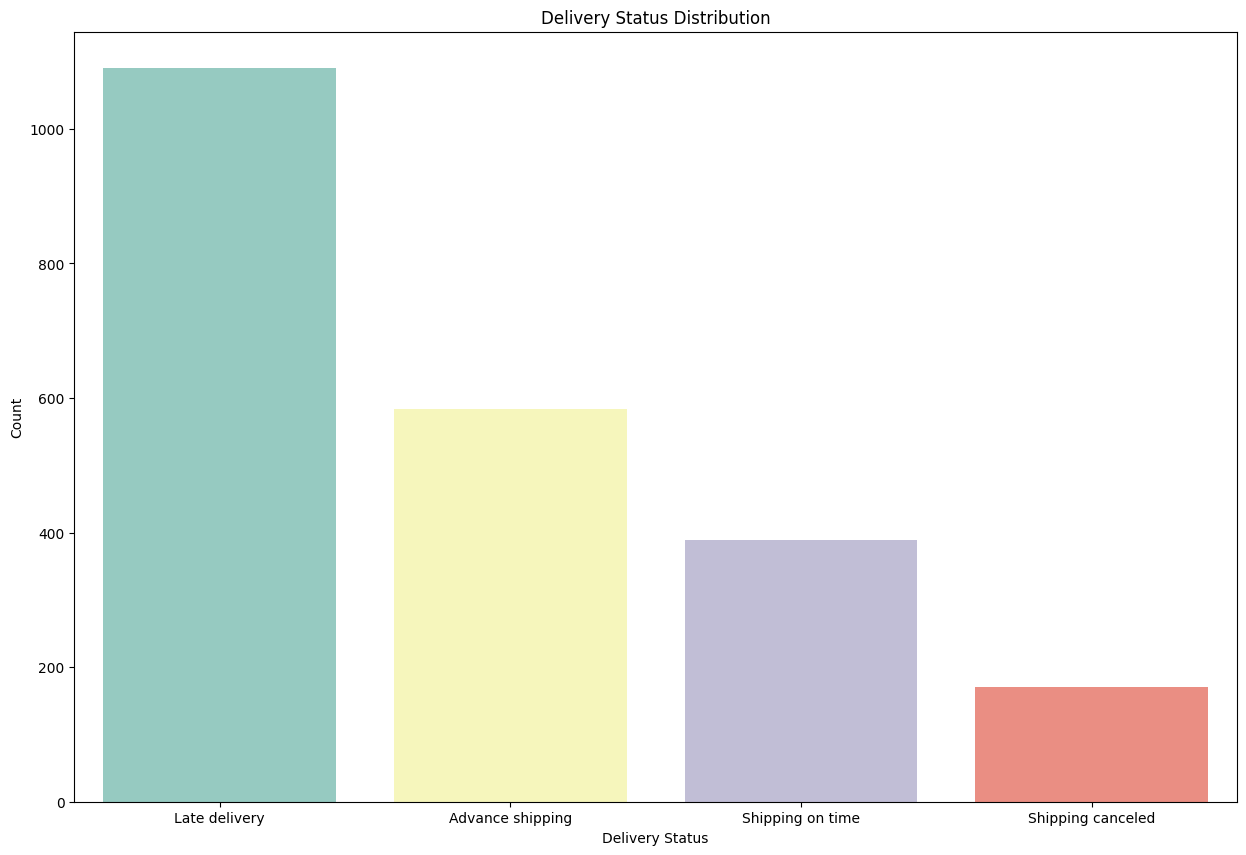

Delivery Status Summary:
Delivery Status
Late delivery        1090
Advance shipping      584
Shipping on time      389
Shipping canceled     171
Name: count, dtype: int64


In [24]:
delivery_status_data = df['Delivery Status']

#distribution
delivery_counts = delivery_status_data.value_counts()

plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Delivery Status', order=delivery_counts.index, palette='Set3')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')
plt.show()

#summary statistics
print("Delivery Status Summary:")
print(delivery_counts)

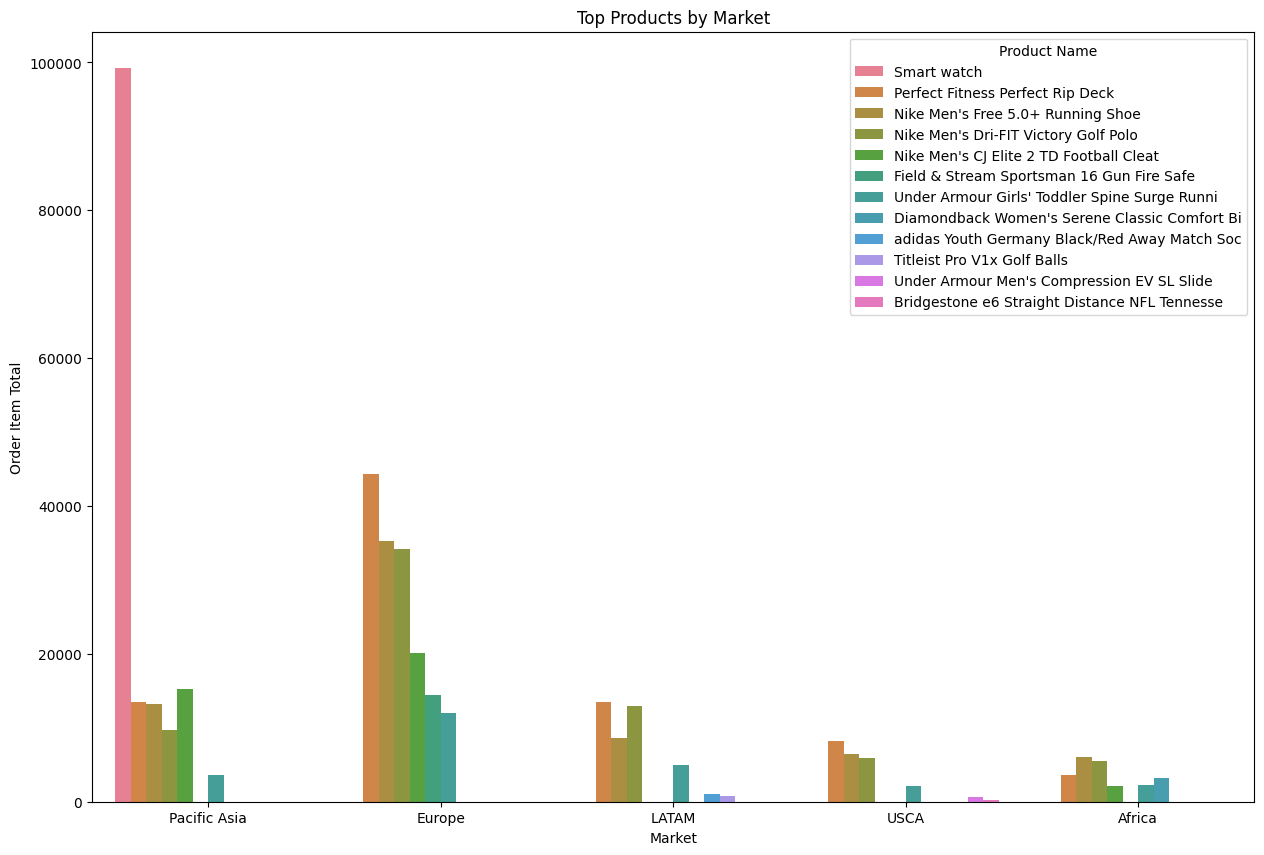

In [25]:
top_products = df.groupby(['Market', 'Product Name'])['Order Item Total'].sum().reset_index()
top_products = top_products.sort_values('Order Item Total', ascending=False).groupby('Market').head(6)

plt.figure(figsize=(15, 10))
sns.barplot(data=top_products, x='Market', y='Order Item Total', hue='Product Name')
plt.title('Top Products by Market')
plt.show()

<Figure size 1200x800 with 0 Axes>

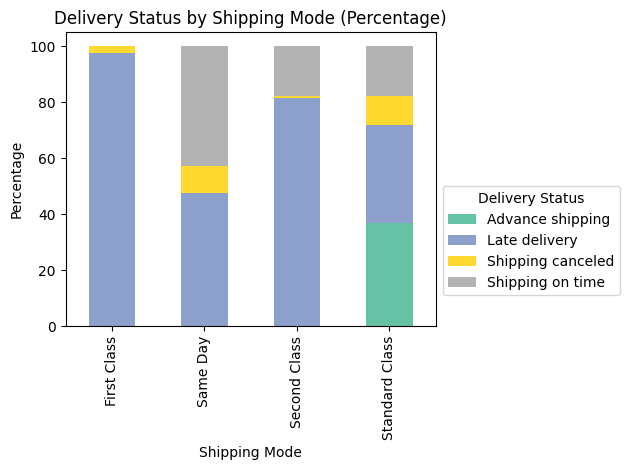

Cross-Tabulation (Contingency Table) with Percentages:
Delivery Status  Advance shipping  Late delivery  Shipping canceled  \
Shipping Mode                                                         
First Class              0.000000      97.590361           2.409639   
Same Day                 0.000000      47.619048           9.523810   
Second Class             0.000000      81.454545           0.909091   
Standard Class          36.962025      34.873418          10.253165   

Delivery Status  Shipping on time  
Shipping Mode                      
First Class              0.000000  
Same Day                42.857143  
Second Class            17.636364  
Standard Class          17.911392  


In [26]:
late_deliveries = df[df['Delivery Status'] == 'Late delivery']
delivery_status_data = df['Delivery Status']
shipping_mode_data = df['Shipping Mode']

cross_table = pd.crosstab(shipping_mode_data, delivery_status_data)

#row percentages
cross_table_percent = cross_table.div(cross_table.sum(1), axis=0) * 100

plt.figure(figsize=(12, 8))
cross_table_percent.plot(kind="bar", stacked=True, colormap='Set2')
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')
plt.legend(title='Delivery Status', loc='upper left',bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

#cross-tabulation with percentages
print("Cross-Tabulation (Contingency Table) with Percentages:")
print(cross_table_percent)

In [27]:
print("Total Sales by Market:")
print(df.groupby('Market')['Sales'].sum())

Total Sales by Market:
Market
Africa           28301.840298
Europe          244382.844295
LATAM            50273.160574
Pacific Asia    184434.181644
USCA             29242.040419
Name: Sales, dtype: float64


#Market and Customer Segment Interactions

<ipython-input-28-c2a619f8bb60>:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Reds), label='Node Degree')


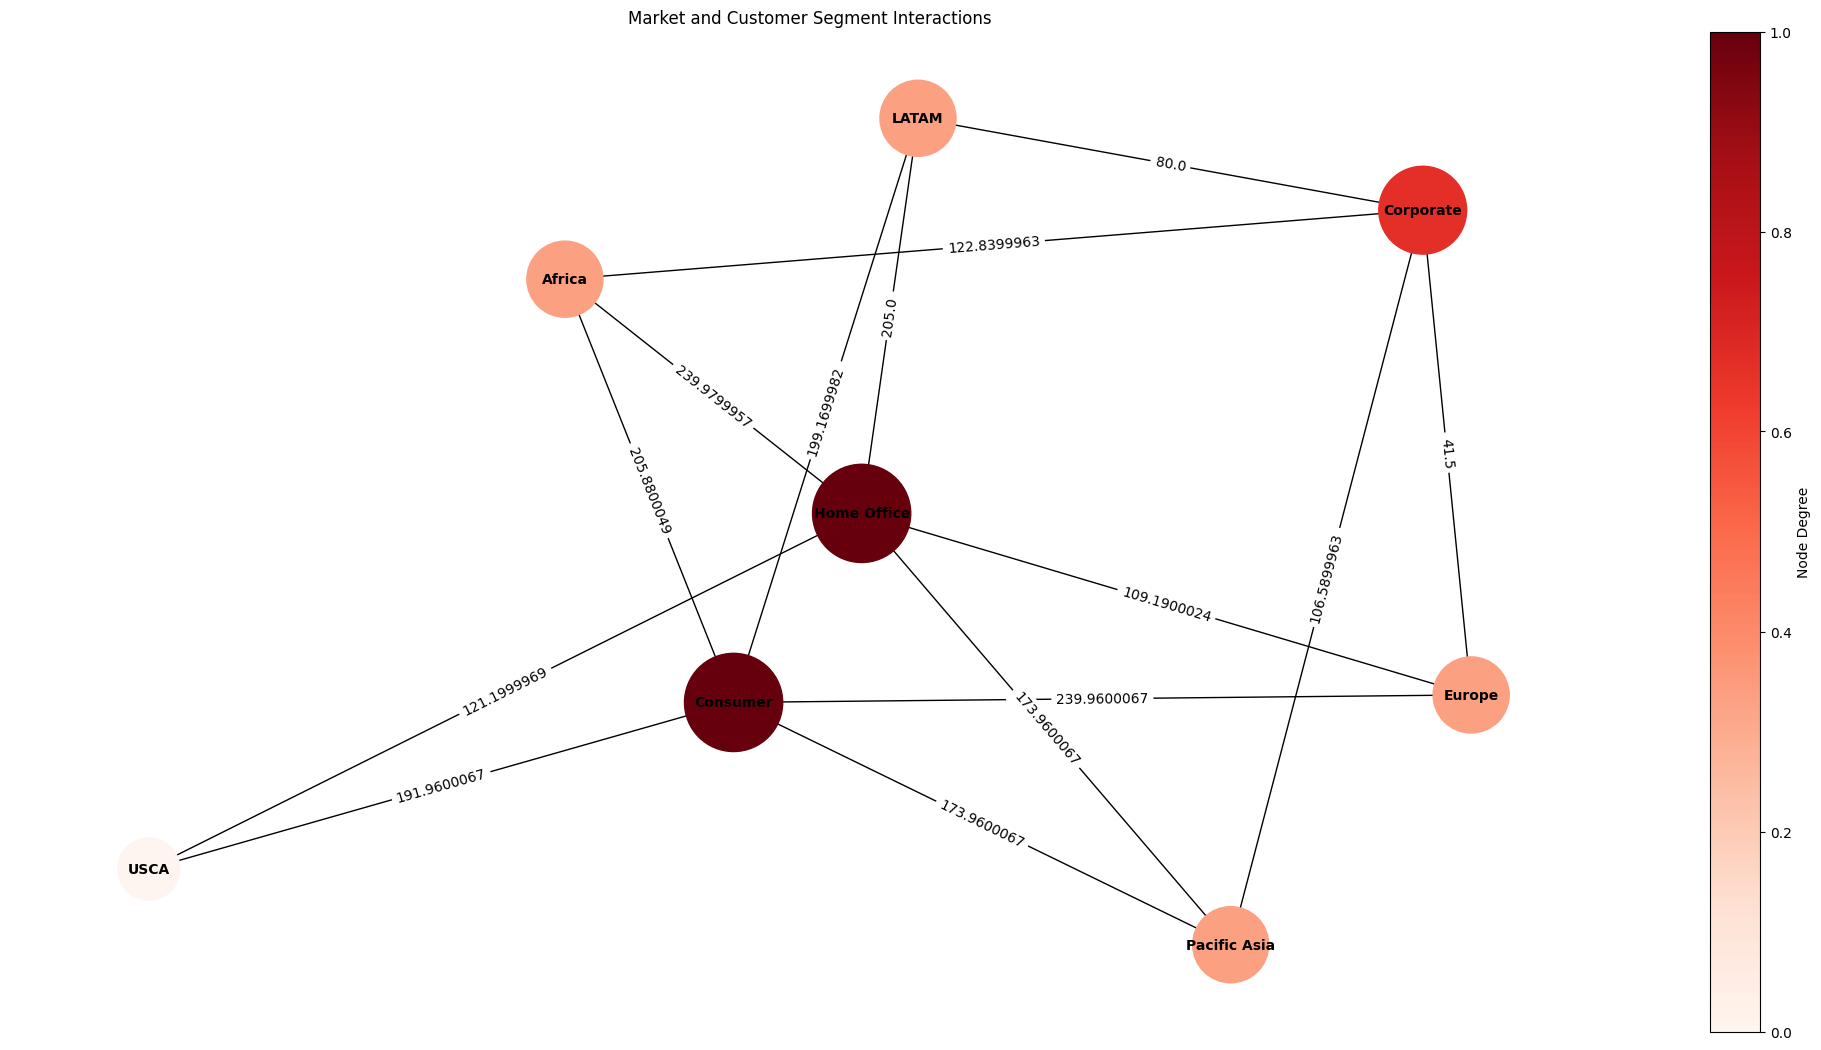

In [28]:
import networkx as nx
Gmarkseg = nx.Graph()
for _, df in df.iterrows():
  Gmarkseg.add_edge(df['Market'], df['Customer Segment'], weight=df['Order Item Total'])
pos = nx.spring_layout(Gmarkseg, seed=9)

#node size based on degrees of a node
node_sizes = [1000 * Gmarkseg.degree(n) for n in Gmarkseg.nodes()]
node_colors = [Gmarkseg.degree(n) for n in Gmarkseg.nodes()]
plt.figure(figsize=(20,10))
nx.draw(Gmarkseg, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.Reds, font_size=10, font_weight='bold')

edge_labels = nx.get_edge_attributes(Gmarkseg, 'weight')
nx.draw_networkx_edge_labels(Gmarkseg, pos, edge_labels=edge_labels)

plt.title('Market and Customer Segment Interactions')
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Reds), label='Node Degree')
plt.show()